In [1]:
## load necessary libraries
%matplotlib inline
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons
import os,time,subprocess,glob
from PIL import Image
import cripser as cr
import tcripser as tcr
import persim
import skimage
from skimage import io
from skimage.transform import rotate
from skimage.data import cells3d
from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt,convolve
import os, re
from tkinter import filedialog
import tkinter as tk


In [2]:
def dt(img,radius=15,signed=False):
#    bw_img = (img >= rank.otsu(img, disk(radius)))
    bw_img = (img >= threshold_otsu(img))
    dt_img = distance_transform_edt(bw_img)
    if signed:
        dt_img -= distance_transform_edt(~bw_img)
    return(dt_img)

def explore_slices(data, cmap="gray"):
    from ipywidgets import interact
    N = data.shape[-1]
    @interact(plane=(0, N - 1))
    def display_slice(plane=N//2):
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.imshow(data[:,:,plane],cmap=cmap)
        plt.show()
    return display_slice


(433, 411) uint8 0--255


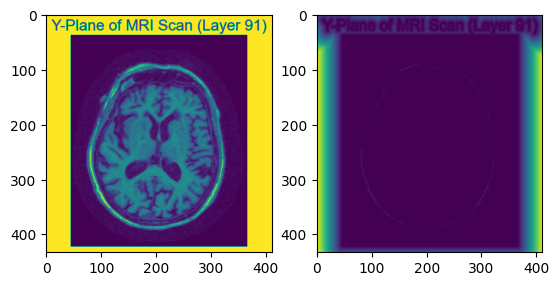

In [14]:
def load_image():
    root = tk.Tk()
    root.withdraw() # Hide the root window

    # Let the user choose the file
    file_path = filedialog.askopenfilename()

    return file_path

# Load image data interactively
imgfile = load_image()

# load image data
if os.path.isfile(imgfile):
    img2d = np.array(Image.open(imgfile).convert('L'))
else: # if file is not found, load the demo img from skimage
    img2d = skimage.data.camera()
    io.imsave(imgfile, img2d)

## apply distance transform
img2d_dt = dt(img2d)

fig,axs = plt.subplots(1,2)
axs[0].imshow(img2d)
axs[1].imshow(img2d_dt)
print(img2d.shape, img2d.dtype, f"{np.min(img2d)}--{np.max(img2d)}")
plt.show()

Betti numbers:  [2430, 2048, 0]
Betti numbers:  [2003, 2408, 0]
elapsed_time:0.3774101734161377 sec


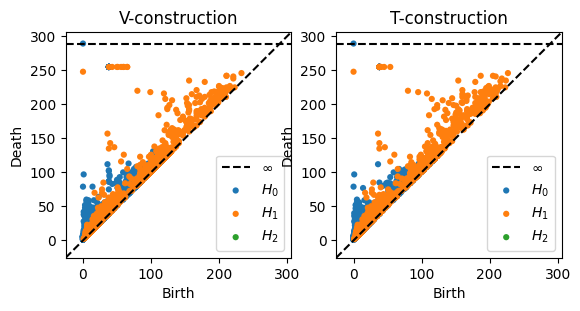

In [15]:
start = time.time()
pd = cr.computePH(img2d)
pds = [pd[pd[:,0] == i] for i in range(3)]
print("Betti numbers: ",[len(pds[i]) for i in range(len(pds))])

# compute PH for the T-construction of the original image (pixel value filtration)
pdt = tcr.computePH(img2d)
pdst = [pdt[pdt[:,0] == i] for i in range(3)]
print("Betti numbers: ",[len(pdst[i]) for i in range(len(pdst))])

print ("elapsed_time:{} sec".format(time.time() - start))
## plot persistent diagram using persim
fig,axs = plt.subplots(1,2)
persim.plot_diagrams([p[:,1:3] for p in pds], ax=axs[0], title='V-construction')
persim.plot_diagrams([p[:,1:3] for p in pdst], ax=axs[1], title='T-construction')


In [10]:
from persim.persistent_entropy import *

from scipy import stats

pd_0 = []

pd_1 = []

pd_2 = []



# Iterate through each row in 'pd'

for row in pd:

    dimension = int(row[0])  # Extract dimension information from the first column

    birth = row[1]  # Extract birth coordinate

    death = row[2]  # Extract death coordinate

    

    # Append birth and death coordinates to the corresponding list based on dimension

    if dimension == 0:

        pd_0.append([birth, death])

    elif dimension == 1:

        pd_1.append([birth, death])

    elif dimension == 2:

        pd_2.append([birth, death])



# Convert lists to NumPy arrays

pd_0 = np.array(pd_0)

pd_1 = np.array(pd_1)

pd_2 = np.array(pd_2)



# Print the shapes of the arrays

print("Shape of pd[0]:", pd_0.shape)

print("Shape of pd[1]:", pd_1.shape)

print("Shape of pd[2]:", pd_2.shape)







e0= persistent_entropy(pd_0)

e1= persistent_entropy(pd_1)

#e2= persistent_entropy(pd_2)

print(e0)

print(e1)
#print(e2)

Shape of pd[0]: (1544, 2)
Shape of pd[1]: (1131, 2)
Shape of pd[2]: (0,)
[4.75971834e-302]
[5.78938254]


In [13]:
import numpy as np

# Extract individual persistence diagrams
pd_0 = []
pd_1 = []
pd_2 = []

for row in pd:
    dimension = int(row[0])  # Extract dimension information from the first column
    birth = row[1]  # Extract birth coordinate
    death = row[2]  # Extract death coordinate
    
    if dimension == 0:
        pd_0.append([birth, death])
    elif dimension == 1:
        pd_1.append([birth, death])
    elif dimension == 2:
        pd_2.append([birth, death])

# Convert lists to NumPy arrays
pd_0 = np.array(pd_0)
pd_1 = np.array(pd_1)
pd_2 = np.array(pd_2)

# Find the maximum number of columns among all non-empty arrays
max_cols = max(pd_0.shape[1] if pd_0.size else 0,
               pd_1.shape[1] if pd_1.size else 0,
               pd_2.shape[1] if pd_2.size else 0)

# Reshape arrays to have the same number of columns
pd_0 = np.pad(pd_0, ((0, 0), (0, max_cols - pd_0.shape[1])), mode='constant') if pd_0.size else np.array([])
pd_1 = np.pad(pd_1, ((0, 0), (0, max_cols - pd_1.shape[1])), mode='constant') if pd_1.size else np.array([])
pd_2 = np.pad(pd_2, ((0, 0), (0, max_cols - pd_2.shape[1])), mode='constant') if pd_2.size else np.array([])

# Stacked persistence diagram
stacked_pd = np.concatenate((pd_0, pd_1, pd_2), axis=0)

# Calculate stacked entropy
stacked_entropy = persistent_entropy(stacked_pd)
print("Stacked entropy:", stacked_entropy)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 2 has 1 dimension(s)